### <div class='alert alert-warning'>Suicide in India Analysis</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('suicides.csv')

In [3]:
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [4]:
df.shape

(237519, 7)

**`237519 rows 
7 columns`**

##### <div class='alert alert-info'>Let us check the data info </div>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


**`Inference:-`**

`1. 7 Columns are available`<br>
`2. 2 integer columns and the rest string columns`

##### <div class='alert alert-info'>Data Description</div>

In [6]:
df.describe()

,Year,Total
count,237519.000000,237519.000000
mean,2006.500448,55.034477
std,3.452240,792.749038
min,2001.000000,0.000000
25%,2004.000000,0.000000
50%,2007.000000,0.000000
75%,2010.000000,6.000000
max,2012.000000,63343.000000


**`Inference:-`**

`1. Total - max looks way off than 75th percentile. - Potential strong outlier. - Outlier treatment`
`2. Year inferences does not make sense. Still would keep it / use this as category`

In [7]:
df.describe(exclude='number')

,State,Type_code,Type,Gender,Age_group
count,237519,237519,237519,237519,237519
unique,38,5,69,2,6
top,Madhya Pradesh,Causes,Others (Please Specify),Male,15-29
freq,6792,109200,7263,118879,45223


In [8]:
df.describe(include='all')

,State,Year,Type_code,Type,Gender,Age_group,Total
count,237519,237519.000000,237519,237519,237519,237519,237519.000000
unique,38,NaN,5,69,2,6,NaN
top,Madhya Pradesh,NaN,Causes,Others (Please Specify),Male,15-29,NaN
freq,6792,NaN,109200,7263,118879,45223,NaN
mean,NaN,2006.500448,NaN,NaN,NaN,NaN,55.034477
std,NaN,3.452240,NaN,NaN,NaN,NaN,792.749038
min,NaN,2001.000000,NaN,NaN,NaN,NaN,0.000000
25%,NaN,2004.000000,NaN,NaN,NaN,NaN,0.000000
50%,NaN,2007.000000,NaN,NaN,NaN,NaN,0.000000
75%,NaN,2010.000000,NaN,NaN,NaN,NaN,6.000000


In [9]:
df['Type_code'].unique()

array(['Causes', 'Education_Status', 'Means_adopted',
       'Professional_Profile', 'Social_Status'], dtype=object)

##### <div class='alert alert-info'>Lets check if null value is present</div>

In [10]:
df.isnull().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

**No null value is present**

##### <div class='alert alert-info'>Lets check we are analysing the data for which years</div>

In [11]:
df['Year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012], dtype=int64)

**So we are analysing the data for the years 2001 - 2012**

##### <div class='alert alert-info'>Removing the poteintial outlier</div>

In [12]:
u_th = df['Total'].quantile(0.99)
l_th = df['Total'].quantile(0.01)

In [13]:
df_filtered = df[(df['Total'] < u_th) & (df['Total'] > l_th)]

In [14]:
print(df.shape)
print(df_filtered.shape)

(237519, 7)
(99661, 7)


In [15]:
((df.shape[0]-df_filtered.shape[0])/ df.shape[0])*100

58.0408304177771

**So by doing this we will lose 58% of the rows which is a huge number number so we will work in the original data**

##### <div class='alert alert-info'>Univariate Analysis</div>

E:\Tools_For_Study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Tools_For_Study\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


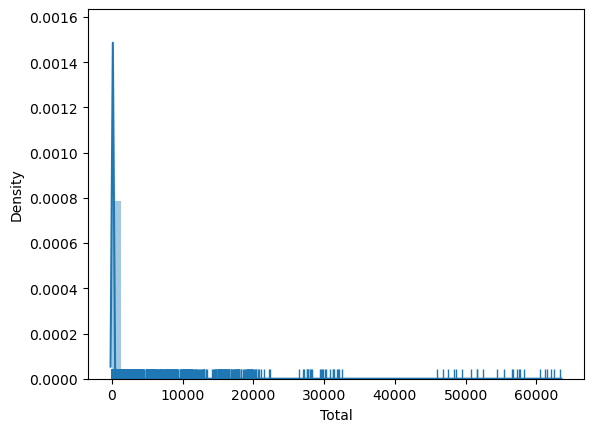

In [16]:
sns.distplot(df['Total'],rug=True)
plt.show();

**`Inference :-`**

So we can see that the density is quite high on the first few values probably 0-10, specially 0.<br>
There are very less number of suicides within the range of 4000.<br>
The outliers can also be observed.

##### If we want to  work on the data  where the suicides are always present(i.e > 0)

In [17]:
de=df[df['Total']!=0]

In [18]:
print(df.shape)
print(de.shape)

(237519, 7)
(102038, 7)


In [19]:
df.shape[0]-de.shape[0]

135481

So we have removed "135481" rows and now will work on the data where suicides are always more than 0

In [20]:
de['Total'].unique()

array([   1,    8,    6, ..., 3927, 1513, 5451], dtype=int64)

In [21]:
de['Total'].value_counts()

1       16047
2        9942
3        6704
4        5121
5        4180
        ...  
1392        1
3176        1
7634        1
1063        1
5451        1
Name: Total, Length: 2179, dtype: int64

In [22]:
de.columns

Index(['State', 'Year', 'Type_code', 'Type', 'Gender', 'Age_group', 'Total'], dtype='object')

**Now we will do analysis on the data where are total cases are always more than 0.**

##### <div class='alert alert-info'>Bivariate Analysis</div>

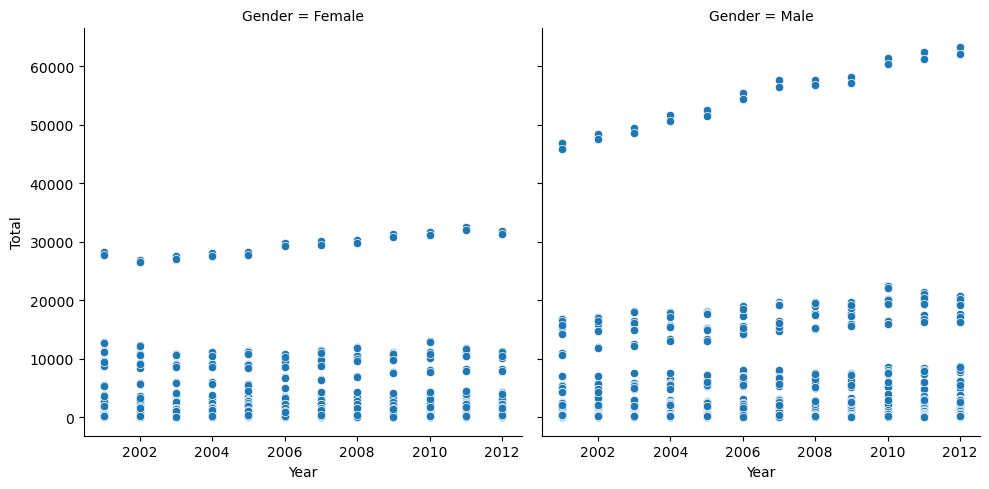

In [23]:
sns.relplot(data=de,x='Year',y='Total',col='Gender')
plt.show()

**`Inference :-1**

We can see with the increase in year the total suicide cases is also increasing in the case of males

The total cases seems more for males in some cases than that of females

Let us check this again using pie chart

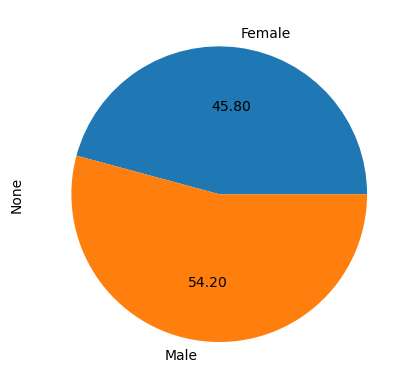

In [24]:
de.groupby('Gender').size().plot(kind='pie',autopct='%.2f')
plt.show()

`Males attempting suicides are 54.19 % which is more than that of females 45.80%.`

##### Some more analysis

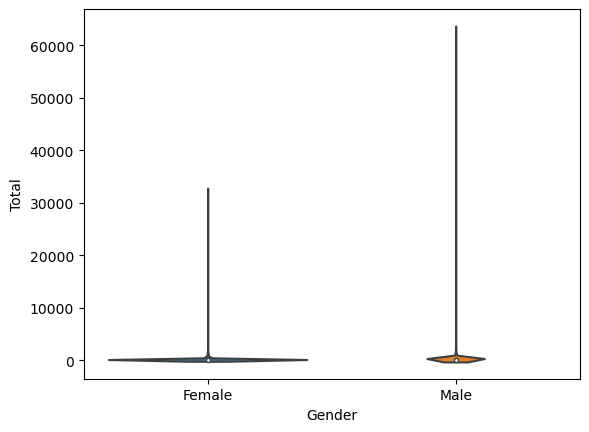

<Figure size 20000x20000 with 0 Axes>

In [25]:
sns.violinplot(y=de['Total'],x=de['Gender'])
plt.figure(figsize=(200,200))
plt.show()

**`Inference :-`**

We can see a huge concentration of data for females near the value 1 so that means the total number of less suicide case is for womans although we can see a potential outlier as well

There is a huge potential outlier in the case of males

##### <div class='alert alert-info'>Let us check the correlation between year and total suicide cases</div>

In [26]:
df.corr()

,Year,Total
Year,1.000000,0.005231
Total,0.005231,1.000000


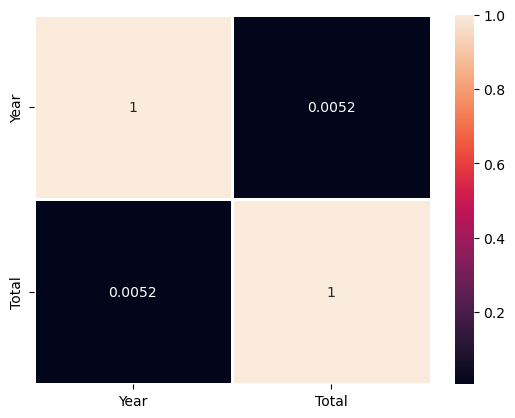

In [27]:
sns.heatmap(df.corr(),annot=True,linewidth=2)
plt.show()

There is a slight positive correlation between total cases and the increase in year

So with the increase in year the cases has increased

##### <div class='alert alert-info'>Lets solve some analytical questions for the betterment of the analysis</div>

In [28]:
de.columns

Index(['State', 'Year', 'Type_code', 'Type', 'Gender', 'Age_group', 'Total'], dtype='object')

##### <div class='alert alert-info'>Which is the type of reason for the maximum number of suicides(Top 5)</div>

In [29]:
de['Type'].nunique()

69

In [30]:
de.groupby('Type')['Total'].sum().sort_values(ascending=False).head()

Type
Married          3065322
Primary          1088481
Middle           1028913
No Education      965271
Never Married     954903
Name: Total, dtype: int64

<AxesSubplot:xlabel='Type'>

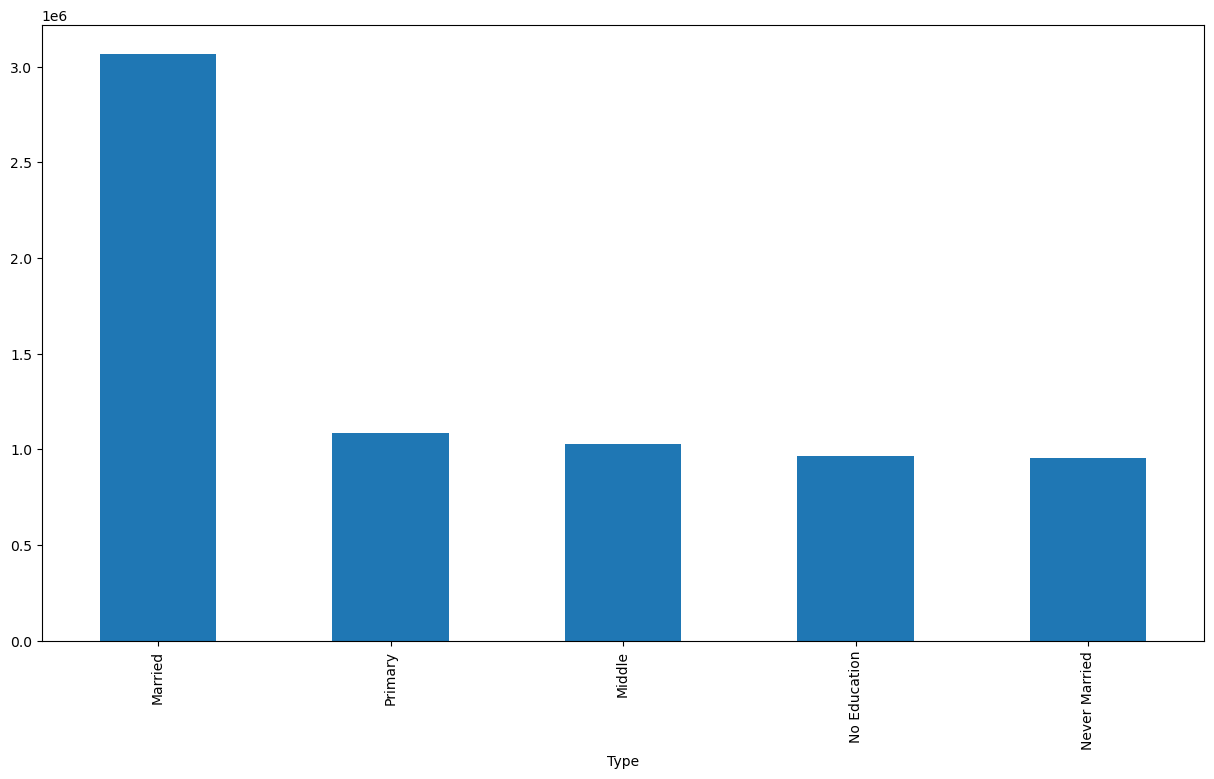

In [31]:
de.groupby('Type')['Total'].sum().sort_values(ascending=False).head().plot.bar(figsize=(15,8))

**`Inference`** :-

Maximum people are attempting suicides because of their marriage

##### <div class='alert alert-info'>In which state we are seeing the maximum number of suicides(Top 7)</div>

In [32]:
de.columns

Index(['State', 'Year', 'Type_code', 'Type', 'Gender', 'Age_group', 'Total'], dtype='object')

In [33]:
de.groupby('State')['Total'].sum().sort_values(ascending=False).head(9)

State
Total (All India)    2911862
Total (States)       2858026
Maharashtra           901945
West Bengal           849936
Tamil Nadu            818691
Andhra Pradesh        814059
Karnataka             734825
Kerala                538946
Madhya Pradesh        451535
Name: Total, dtype: int64

In [34]:
dg=de[(de['State']!='Total (All India)')&(de['State']!='Total (States)')]

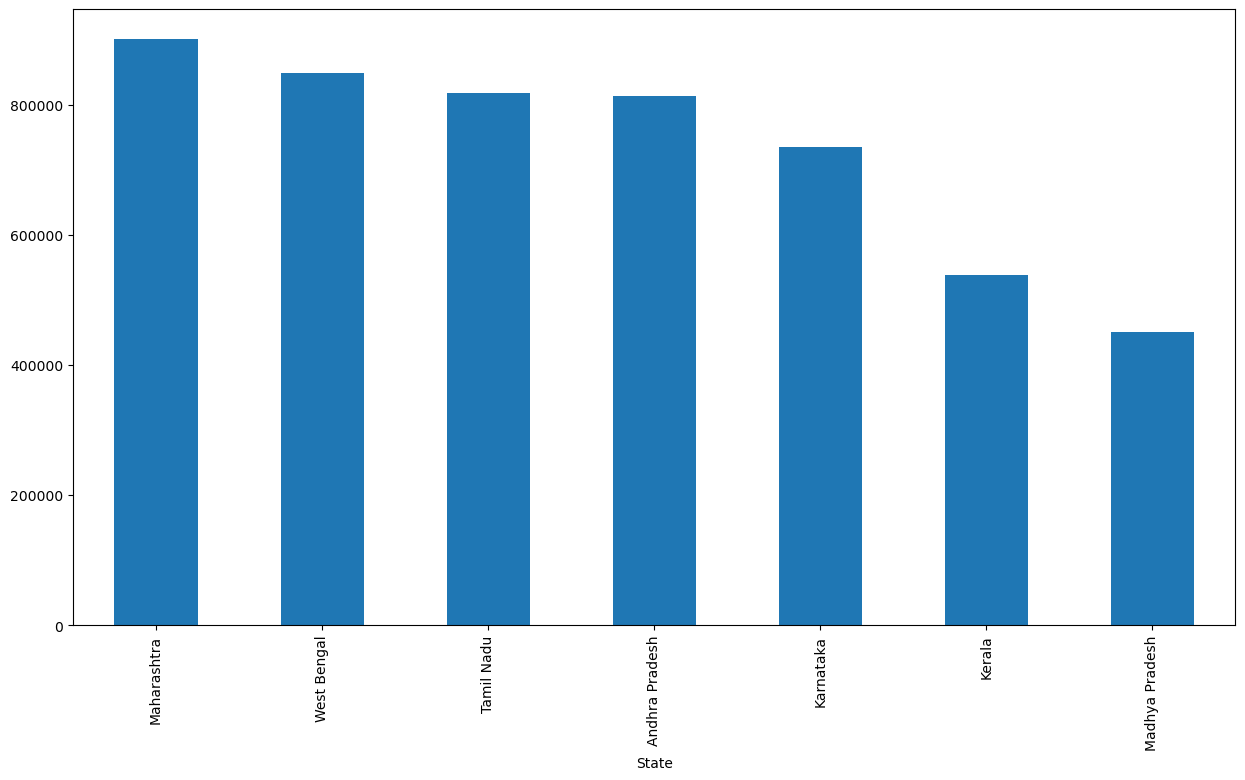

In [35]:
dg.groupby('State')['Total'].sum().sort_values(ascending=False).head(7).plot.bar(figsize=(15,8))
plt.show()

So in Maharashtra we are seeing the maximum number of suicides followed by West Bengal, Tamil Nadu and so on

##### <div class='alert alert-info'>In which state we are seeing the minimum number of suicides(Top 6)</div>

In [36]:
de.groupby('State')['Total'].sum().sort_values().head(6)

State
Lakshadweep       50
Daman & Diu     1391
Nagaland        1728
Manipur         2102
D & N Haveli    3430
Mizoram         4154
Name: Total, dtype: int64

<AxesSubplot:xlabel='State'>

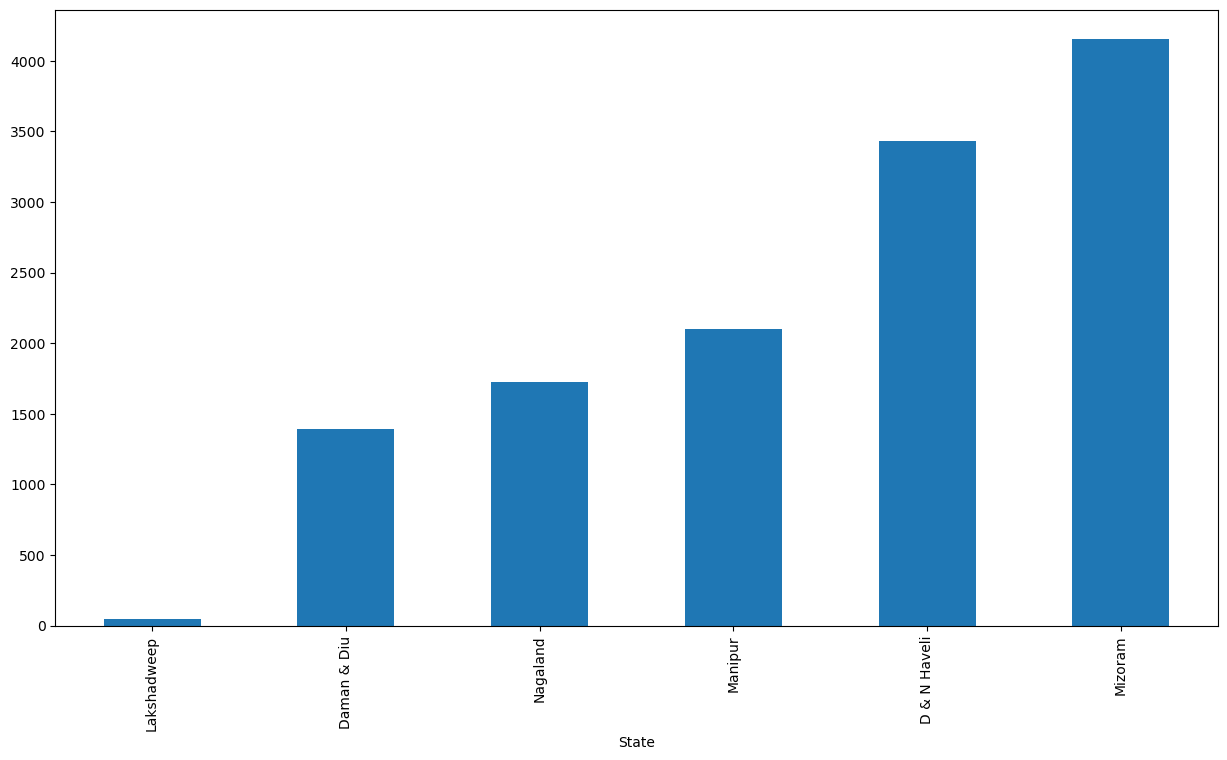

In [37]:
de.groupby('State')['Total'].sum().sort_values().head(6).plot.bar(figsize=(15,8))

So in Lakshwadeep we are seeing the minimum number of suicides followed by Daman & Diu , Nagaland and so on

##### <div class='alert alert-info'>Which is the main 'type' of suicide in  UttarPradesh</div>

In [38]:
dm=de[de['State']=='Uttar Pradesh']

In [39]:
dm.shape

(4954, 7)

In [40]:
dm.groupby('Type')['Total'].sum().sort_values(ascending=False).head(1)

Type
Married    31391
Name: Total, dtype: int64

**`Inference`**

In UP most the suicide were done by couple.

##### <div class='alert alert-info'>Showing the variation of all 'types' of suicides from out data</div>

E:\Tools_For_Study\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


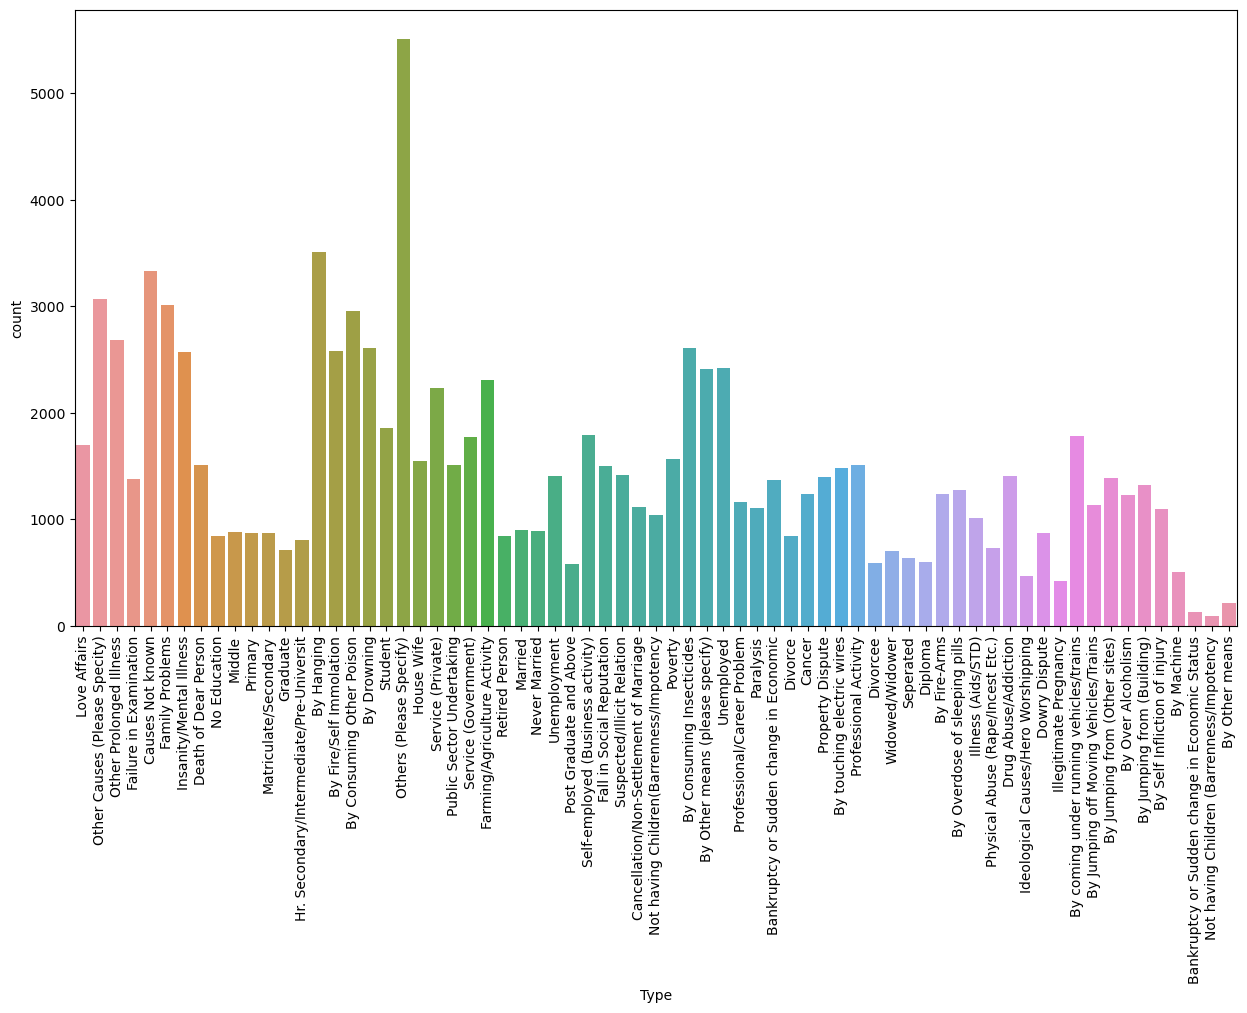

In [41]:
plt.figure(figsize=(15,8))
sns.countplot(de['Type'])
plt.xticks(rotation = 90);

##### <div class='alert alert-info'>In which state maximum prople commited suicide due to love affairs</div>

In [42]:
ds=de[de['Type']=='Love Affairs']

In [43]:
ds.groupby('State')['Total'].sum().sort_values(ascending=False).head()

State
West Bengal       9606
Tamil Nadu        5684
Assam             4852
Andhra Pradesh    3325
Maharashtra       2872
Name: Total, dtype: int64

<AxesSubplot:xlabel='State'>

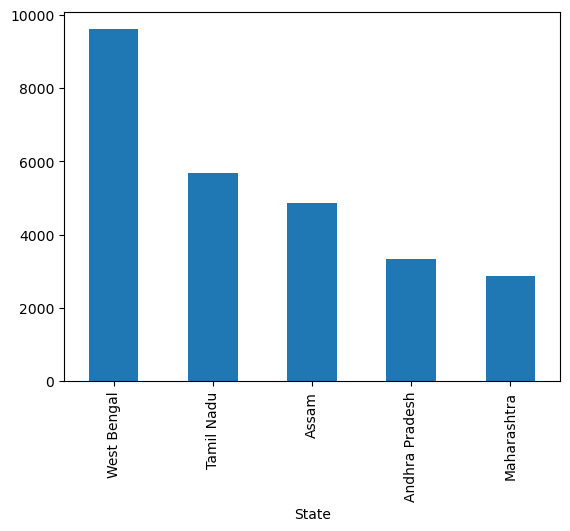

In [44]:
ds.groupby('State')['Total'].sum().sort_values(ascending=False).head().plot.bar()

**`Inference`** 

Maximum people who are dying due to love affairs are in West Bengal followed up by Tamil Nadu, Assam and so on

##### <div class='alert alert-info'>In which state maximum people are doing suicide due to Drug Abuse/Addiction</div>

In [45]:
ds=de[de['Type']=='Drug Abuse/Addiction']

In [46]:
ds.groupby('State')['Total'].sum().sort_values(ascending=False).head()

State
Maharashtra       12671
Madhya Pradesh     3031
Kerala             2113
Tamil Nadu         1952
Chhattisgarh       1695
Name: Total, dtype: int64

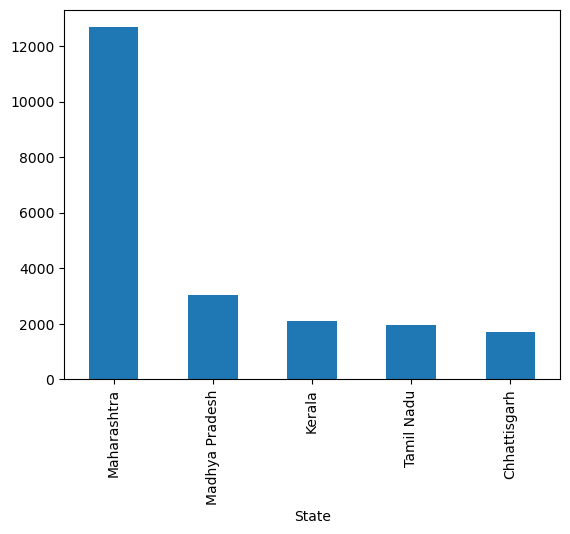

In [47]:
ds.groupby('State')['Total'].sum().sort_values(ascending=False).head().plot.bar()
plt.show()

**`Inference`**

Maximum people who are dying due to Drug Abuse/Addiction are from Maharashtra,Madhya Pradesh,Kerela and so on

##### <div class='alert alert-info'>Which age Category other than '0-100' is having more suicides in the year 2002</div>

In [48]:
de['Age_group'].unique()

array(['0-14', '15-29', '30-44', '45-59', '60+', '0-100+'], dtype=object)

In [49]:
dr=de[de['Age_group']!='0-100+']

In [50]:
dr=dr[dr['Year']==2002]

In [51]:
dr.groupby('Age_group')['Total'].sum().sort_values(ascending=False).head()

Age_group
15-29    117864
30-44    112529
45-59     65482
60+       26639
0-14       8632
Name: Total, dtype: int64

<AxesSubplot:xlabel='Age_group'>

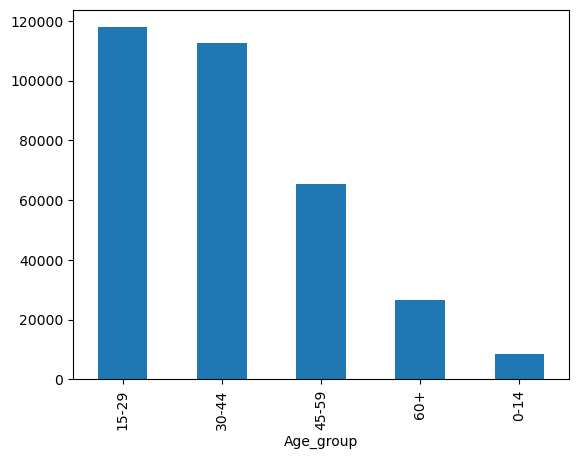

In [52]:
dr.groupby('Age_group')['Total'].sum().sort_values(ascending=False).head().plot.bar()

**`Inference`** -->

The age group 15-29 is making the most number of suicide cases in the year 2002